In [29]:
# Import used libraries
import numpy as np
import matplotlib.pyplot as plt  # for plots
from sklearn import linear_model
from matplotlib import rc
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Math, Latex

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
#
# Should be set to use Latex
#
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'text.fontsize': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)


## Questions 1 et 2

In [5]:
#
# Question 1
# Load Galton dataset
#
dataset = pd.read_csv('http://www.math.uah.edu/stat/data/Galton.txt', sep='\t')

#
# Question 2 : add MeanParents column to panda DataFrame
#
dataset['MeanParents'] = (dataset['Father']+1.08*dataset['Mother'])/2.

# Create X and y series
X = dataset[['MeanParents']]
y = dataset['Height']


In [7]:
dataset.head(7)

,Family,Father,Mother,Gender,Height,Kids,MeanParents
0,1,78.5,67.0,M,73.2,4,75.43
1,1,78.5,67.0,F,69.2,4,75.43
2,1,78.5,67.0,F,69.0,4,75.43
3,1,78.5,67.0,F,69.0,4,75.43
4,2,75.5,66.5,M,73.5,4,73.66
5,2,75.5,66.5,M,72.5,4,73.66
6,2,75.5,66.5,F,65.5,4,73.66


## Question 3 et 4

Valeurs des paramètres de la régression calculés avec sklearn:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Valeurs des paramètres de la régression calculés avec les formules du cours:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

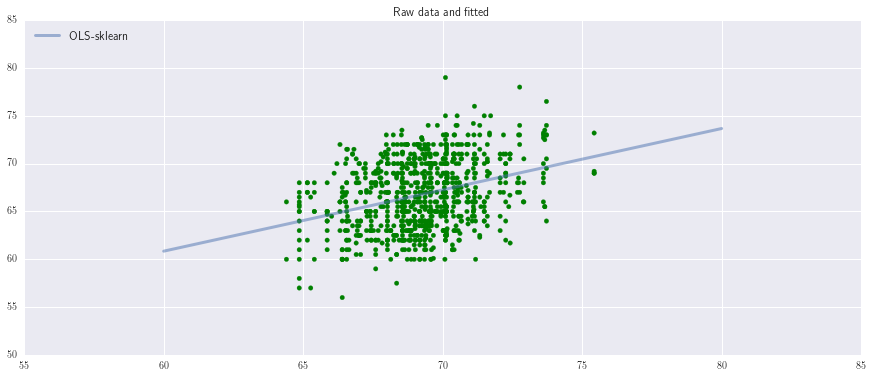

In [52]:
#
# Question 3 : plot (x_i,y_i) points
#
fig1 = plt.figure(figsize=(15, 6))
plt.subplots_adjust(hspace=0.3)
plt.scatter(X, y, color='green', marker='o')
#
# Question 4
# Fit regression model (with sklearn)
#
skl_linmod1 = linear_model.LinearRegression(fit_intercept=True)
skl_linmod1.fit(X, y)
# Define points to display line
X_to_predict = np.linspace(60.0, 80.0, num=50).reshape(50, 1)
X_to_predict = pd.DataFrame(X_to_predict, columns=['mean'])
# Display line
plt.plot(X_to_predict, skl_linmod1.predict(X_to_predict),
         linewidth=3, label="OLS-sklearn", alpha=0.5)
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.title('Raw data and fitted')

theta = [skl_linmod1.intercept_, skl_linmod1.coef_[0]]
print("===============================================================")
print('Valeurs des paramètres de la régression calculés avec sklearn:')
print("===============================================================")
display(Math(r'$\widehat{\theta_1}='+r'{0}$'.format(theta[1])))
display(Math(r'$\widehat{\theta_0}='+r'{0}$'.format(theta[0])))
print("============================================================================")
print('Valeurs des paramètres de la régression calculés avec les formules du cours:')
print("============================================================================")
theta1 = ((dataset['MeanParents'].head()-dataset['MeanParents'].mean())*(dataset['Height'].head()-dataset['Height'].mean())).sum()
theta1 = theta1 / ((dataset['MeanParents'].head()-dataset['MeanParents'].mean())**2).sum()
theta0 = dataset['Height'].mean()-theta1*dataset['MeanParents'].mean()
display(Math(r'$\widehat{\theta_1}=\frac{\sum_{i=1}^{n}(x_i-\bar{x_n})(y_i-\bar{y_n})}{\sum_{i=1}^{n}(x_i-\bar{x_n})^2}='+r'{0}$'.format(theta1)))
display(Math(r'$\widehat{\theta_0}=\bar{y_n} -\widehat{\theta_1}\bar{x_n}='+r'{0}$'.format(theta0)))

## Question 5

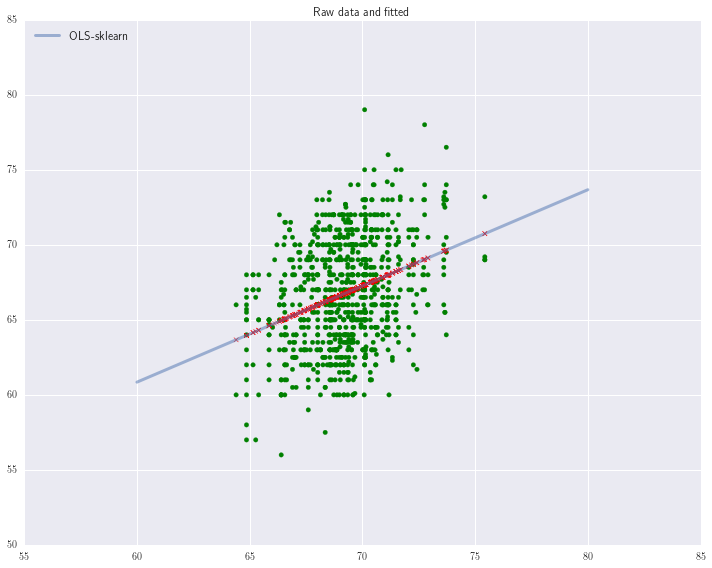

In [56]:
#
# Question 5 : images des x_i par la régression linéaire
#
fig2 = plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.3)
plt.scatter(X, y, color='green', marker='o')
# Display line
plt.plot(X_to_predict, skl_linmod1.predict(X_to_predict),
         linewidth=3, label="OLS-sklearn", alpha=0.5)
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.title('Raw data and fitted')
#
# images des données du dataset par l'estimateur
#
y_chapeau = skl_linmod1.predict(X)
plt.scatter(X, y_chapeau, color='red', marker='x')
plt.tight_layout()


## Question 6
L'allure de la distribution des résidus remet en cause l'hypothèse de normalité :

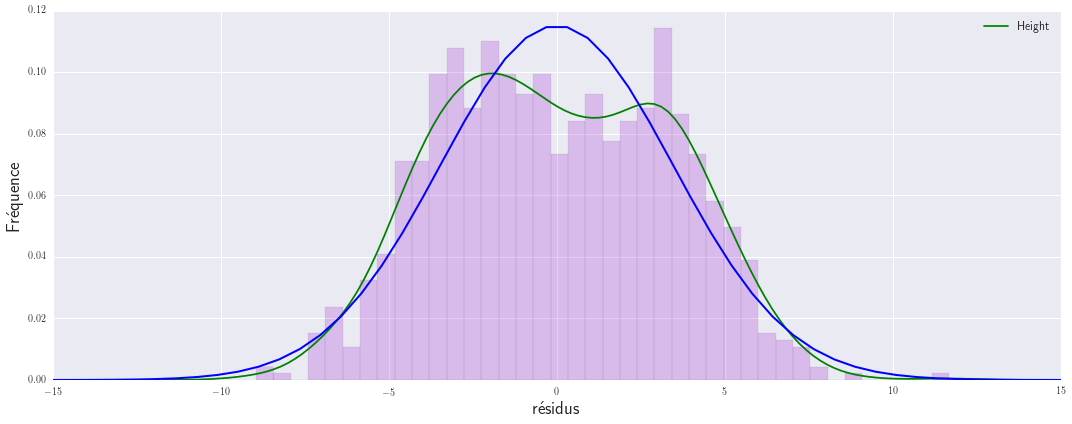

In [83]:
#
# Question 6
# calcul des résidus
#
r1 = y - y_chapeau
purple = (148. / 255, 0, 211. / 255)
fig3 = plt.figure(figsize=(15, 6))
plt.subplots_adjust(hspace=0.3)
plt.hist(r1, bins=40, normed=True, align='mid', color=purple, alpha=0.2)
plt.ylabel(r'$\mbox{Fr\'equence}$', fontsize=18)
plt.xlabel(r'$\mbox{r\'esidus}$', fontsize=18)

plt.subplots_adjust(hspace=0.3)
sns.kdeplot(r1, color='green')

xn = np.linspace(-15., 15.0)
sigma2 = 12
mu = 0

#fig3, ax = plt.subplots(figsize=(10, 3))
plt.plot(xn, 1 / np.sqrt(2 * np.pi * sigma2) *
         np.exp(- (xn - mu) ** 2 / (2 * sigma2)), linewidth=2, color='blue')

plt.tight_layout()


## Question 7

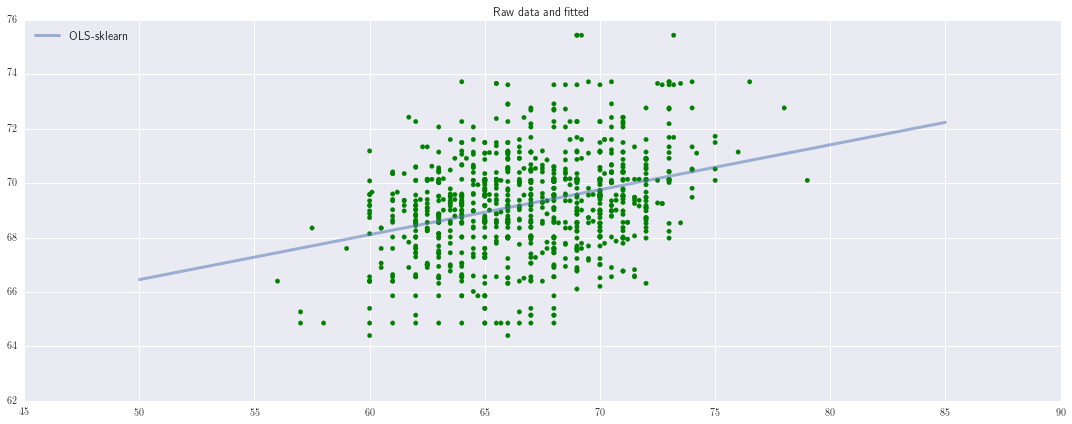

In [86]:
#
# Question7
# Regression de X sur y
#
fig4 = plt.figure(figsize=(15, 6))
plt.subplots_adjust(hspace=0.3)

# Fit regression model (with sklearn)
Xp = dataset['MeanParents']
yp = dataset[['Height']]
skl_linmod2 = linear_model.LinearRegression(fit_intercept=True)
skl_linmod2.fit(yp, Xp)
y_to_predict = np.linspace(50.0, 85.0, num=50).reshape(50, 1)
y_to_predict = pd.DataFrame(y_to_predict, columns=['mean'])

plt.scatter(yp, Xp, color='green', marker='o')
plt.plot(y_to_predict, skl_linmod2.predict(y_to_predict),
         linewidth=3, label="OLS-sklearn", alpha=0.5)
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
#plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data and fitted')
plt.tight_layout()


In [90]:
alpha = [skl_linmod2.intercept_, skl_linmod2.coef_[0]]
print("===============================================================")
print('Valeurs des paramètres de la régression calculés avec sklearn:')
print("===============================================================")
display(Math(r'$\widehat{\alpha_1}='+r'{0}$'.format(alpha[1])))
display(Math(r'$\widehat{\alpha_0}='+r'{0}$'.format(alpha[0])))
print("===================================================================================================")
print('Valeurs des paramètres de la régression calculés à partir des paramètres de la régression inverse :')
print("===================================================================================================")
theta1 = ((dataset['MeanParents'].head()-dataset['MeanParents'].mean())*(dataset['Height'].head()-dataset['Height'].mean())).sum()
theta1 = theta1 / ((dataset['MeanParents'].head()-dataset['MeanParents'].mean())**2).sum()
theta0 = dataset['Height'].mean()-theta1*dataset['MeanParents'].mean()

# computing X_mean, X_std^2, y_mean, y_std^2
X_mean = np.mean(X)
y_mean = np.mean(y)
X_var = np.std(X)**2
y_var = np.std(y)**2

alpha0 = (X_mean+(theta[0]-y_mean)*y_mean*X_var/(X_mean*y_var))
alpha0 = alpha0['MeanParents']
alpha1 = theta[1]*X_var/y_var
alpha1 = alpha1['MeanParents']

display(Math(r'$\widehat{\alpha_1}=\frac{\sigma^2(x)}{\sigma^2(y)}\widehat{\theta_1}='+r'{0}$'.format(alpha1)))
display(Math(r'$\widehat{\alpha_0}=\bar{x_n}+\frac{\bar{y_n}\sigma^2(x)}{\bar{x_n}\sigma^2(y)}(\widehat{\theta_0}-\bar{y_n})='+r'{0}$'.format(alpha0)))

Valeurs des paramètres de la régression calculés avec sklearn:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Valeurs des paramètres de la régression calculés à partir des paramètres de la régression inverse :


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Question 8 et 9 : régression à 2 variables

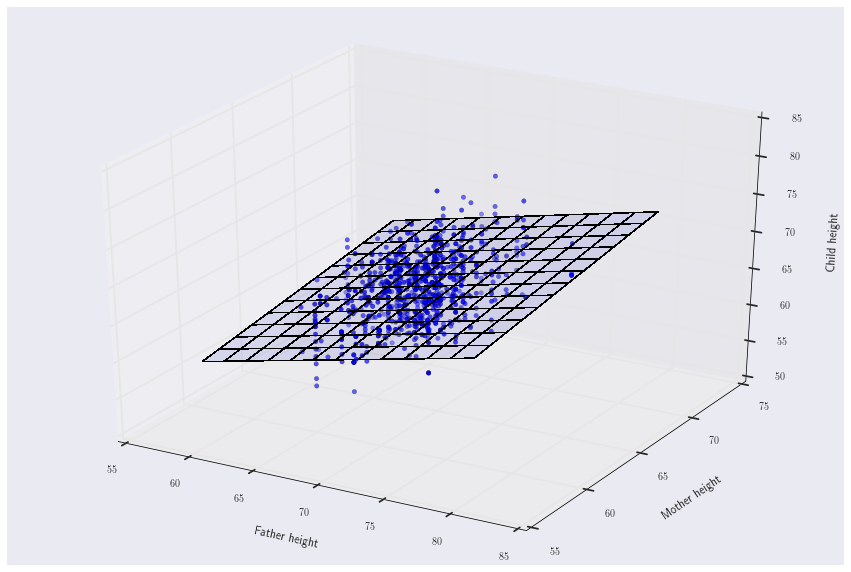

In [104]:
Xm = dataset[['Father', 'Mother']]
Xm.head()
fig5 = plt.figure(figsize=(15, 10)).gca(projection='3d')
plt.subplots_adjust(hspace=0.3)

# Fit regression model (with sklearn)
skl_linmod3 = linear_model.LinearRegression(fit_intercept=True)
skl_linmod3.fit(Xm, y)

xx_min, xx_max = Xm.Father.min() - 2, Xm.Father.max() + 2
yy_min, yy_max = Xm.Mother.min() - 2, Xm.Mother.max() + 2

xx = np.linspace(xx_min, xx_max, 25)
yy = np.linspace(yy_min, yy_max, 25)
xx, yy = np.meshgrid(xx, yy)

zz = xx*skl_linmod3.coef_[0]+yy*skl_linmod3.coef_[1]+skl_linmod3.intercept_
fig5.plot_surface(xx, yy, zz, rstride=2, cstride=2, antialiased=False, alpha=0.1, color='blue')

fig5.scatter(dataset['Father'], dataset['Mother'], dataset['Height'])
fig5.set_xlabel('Father height')
fig5.set_ylabel('Mother height')
fig5.set_zlabel('Child height')


## Question 10

<IPython.core.display.Math object>

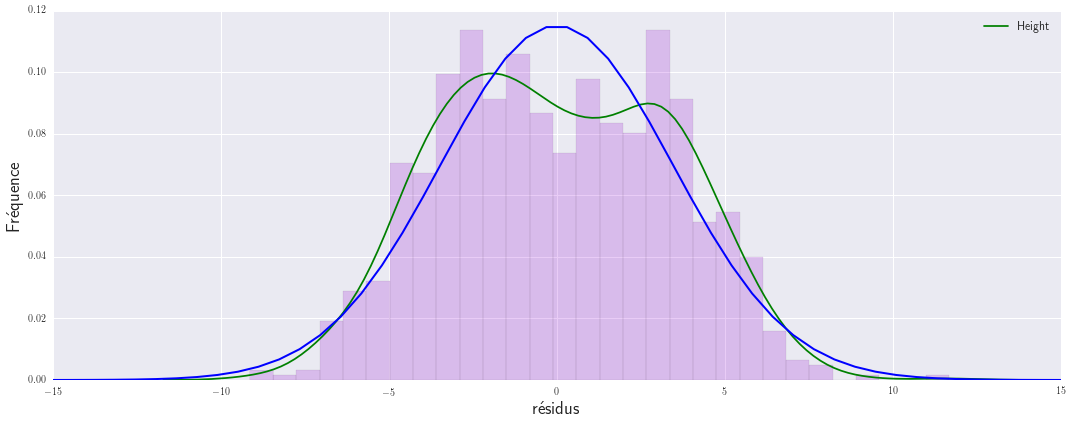

In [96]:
#
# Résidus
#
y_chapeau4 = skl_linmod3.predict(Xm)
r4 = y-y_chapeau4
r4_carre = ((y-y_chapeau4)**2).sum()
display(Math(r'$\left \| r \right \|^2='+r'{0}$'.format(r4_carre)))

fig5 = plt.figure(figsize=(15, 6))
plt.subplots_adjust(hspace=0.3)
plt.hist(r4, bins=30, normed=True, align='mid', color=purple, alpha=0.2)
plt.ylabel(r'$\mbox{Fr\'equence}$', fontsize=18)
plt.xlabel(r'$\mbox{r\'esidus}$', fontsize=18)

plt.subplots_adjust(hspace=0.3)
sns.kdeplot(r1, color='green')

xn = np.linspace(-15., 15.0)
sigma2 = 12
mu = 0

#fig3, ax = plt.subplots(figsize=(10, 3))
plt.plot(xn, 1 / np.sqrt(2 * np.pi * sigma2) *
         np.exp(- (xn - mu) ** 2 / (2 * sigma2)), linewidth=2, color='blue')

plt.tight_layout()


## Question 11

Le coefficient de linéairité associé à la taille du père (1er paramètre) est plus élévé que celui associé à la taille de la mère (second paramètre).<br>
La taille du père semble donc avoir une influence plus importante que celle de la mère.

In [95]:
print (skl_linmod3.coef_)

[ 0.37989697  0.28321451]


### centrer réduire

[[ 0.26192131  0.18236056]]


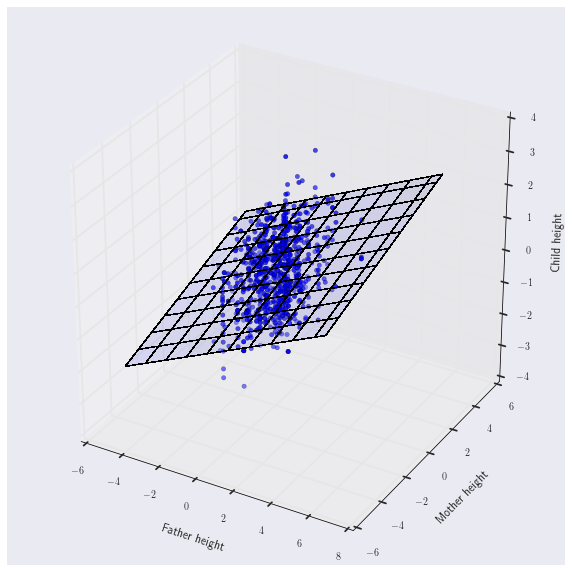

In [113]:
Xmm = preprocessing.scale(Xm.values)
ymm = preprocessing.scale(y.values)
ymm = ymm.T
Xmm = pd.DataFrame(Xmm, columns=['Father', 'Mother'])
ymm = pd.DataFrame(ymm, columns=['Height'])
fig7 = plt.figure(figsize=(10, 10)).gca(projection='3d')
plt.subplots_adjust(hspace=0.3)

fig7.scatter(Xmm['Father'], Xmm['Mother'], ymm['Height'])

# Fit regression model (with sklearn)
skl_linmod4 = linear_model.LinearRegression(fit_intercept=True)
skl_linmod4.fit(Xmm, ymm)

print (skl_linmod4.coef_)

xx_min, xx_max = Xmm.Father.min() - 2, Xmm.Father.max() + 2
yy_min, yy_max = Xmm.Mother.min() - 2, Xmm.Mother.max() + 2

xx = np.linspace(xx_min, xx_max, 20)
yy = np.linspace(yy_min, yy_max, 20)
xx, yy = np.meshgrid(xx, yy)

zz = xx*skl_linmod4.coef_[0][0]+yy*skl_linmod4.coef_[0][1]+skl_linmod4.intercept_
fig7.plot_surface(xx, yy, zz, rstride=2, cstride=2, antialiased=False, alpha=0.1, color='blue')

fig7.set_xlabel('Father height')
fig7.set_ylabel('Mother height')
fig7.set_zlabel('Child height')


[  1.39471252e-14] [[ 0.26192131  0.18236056]]


KeyError: 0

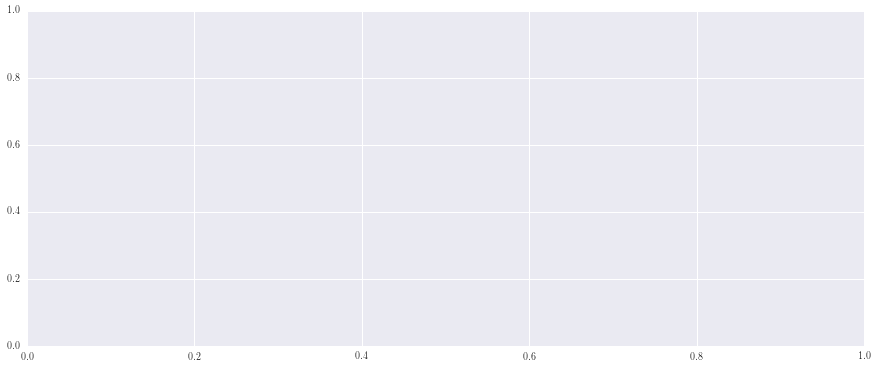

In [114]:
#
# Résidus
#
y_chapeau5 = skl_linmod4.predict(Xmm)
r5 = ymm-y_chapeau5
r5_carre = (ymm-y_chapeau5)**2

print skl_linmod4.intercept_, skl_linmod4.coef_

#print r5_carre
fig8 = plt.figure(figsize=(15, 6))
plt.subplots_adjust(hspace=0.3)
plt.hist(r5_carre, bins=10, normed=True, align='mid', color=purple)
plt.ylabel(r'$\mbox{Fr\'equence}$', fontsize=18)
plt.xlabel(r'$\mbox{r\'esidus}$', fontsize=18)
